# Ансамбли моделей машинного обучения

Цель лабораторной работы: изучение ансамблей моделей машинного обучения.

## Задание

1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие ансамблевые модели:
    1. одну из моделей группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья);
    2. одну из моделей группы бустинга;
    3. одну из моделей группы стекинга.    
5. (+1 балл на экзамене) Дополнительно к указанным моделям обучите еще две модели:
    1. Модель многослойного персептрона. По желанию, вместо библиотеки scikit-learn возможно использование библиотек TensorFlow, PyTorch или других аналогичных библиотек.
    2. Модель МГУА с использованием библиотеки - https://github.com/kvoyager/GmdhPy (или аналогичных библиотек). Найдите такие параметры запуска модели, при которых она будет по крайней мере не хуже, чем одна из предыдущих ансамблевых моделей.    
6. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

## Ход работы

### Выбор и загрузка датасета

In [20]:
# %matplotlib inline
# sns.set(style="ticks")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from heamy.estimator import Classifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from operator import itemgetter

def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df

wine = load_wine()

df = make_dataframe(load_wine)

In [2]:
# Первые 5 строк датасета
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [3]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

In [4]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

alcohol - 0
malic_acid - 0
ash - 0
alcalinity_of_ash - 0
magnesium - 0
total_phenols - 0
flavanoids - 0
nonflavanoid_phenols - 0
proanthocyanins - 0
color_intensity - 0
hue - 0
od280/od315_of_diluted_wines - 0
proline - 0
target - 0


### Разделение на тестовую и обучающую выборки

In [5]:
y = df['target']
x = df.drop('target', axis = 1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size = 0.2, random_state = 0)

print(f"Обучающая выборка:\n{x_train, y_train}")
print(f"Тестовая выборка:\n{x_test, y_test}")

Обучающая выборка:
(array([[0.7       , 0.49802372, 0.63101604, ..., 0.3902439 , 0.2014652 ,
        0.28673324],
       [0.43684211, 0.15612648, 0.48128342, ..., 0.3902439 , 0.28937729,
        0.15477889],
       [0.15526316, 0.24703557, 0.49197861, ..., 0.55284553, 0.61904762,
        0.04778887],
       ...,
       [0.36578947, 0.17193676, 0.44385027, ..., 0.47154472, 0.61904762,
        0.04778887],
       [0.75526316, 0.18577075, 0.40641711, ..., 0.3495935 , 0.75457875,
        0.5042796 ],
       [0.82368421, 0.34980237, 0.59893048, ..., 0.11382114, 0.16117216,
        0.2724679 ]]), 161    2.0
92     1.0
94     1.0
174    2.0
24     0.0
      ... 
103    1.0
67     1.0
117    1.0
47     0.0
172    2.0
Name: target, Length: 142, dtype: float64)
Тестовая выборка:
(array([[0.71315789, 0.18379447, 0.47593583, 0.29896907, 0.52173913,
        0.55862069, 0.54008439, 0.1509434 , 0.38170347, 0.38993174,
        0.35772358, 0.70695971, 0.55777461],
       [0.46315789, 0.38142292, 0.5989

### Бэггинг

In [7]:
# Обучим классификатор на 5 деревьях
bc = BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)
bc_prediction = bc.fit(x_train, y_train).predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


### Градиентный бустинг

In [8]:
gb = GradientBoostingClassifier(random_state=0)
gb_prediction = gb.fit(x_train, y_train).predict(x_test)

### Стекинг

In [21]:
# Качество отдельных моделей
def val_mae(model):
    st_prediction = model.fit(x_train, y_train).predict(x_test)
#     y_pred = model.predict(boston_X_test)
#     result = mean_absolute_error(boston_y_test, y_pred)
    print(model)
    print('Accuracy score={}'.format(accuracy_score(y_test, st_prediction)))

In [22]:
# Точность на отдельных моделях
for model in [
    LogisticRegression(),
    svm.SVC(),
    DecisionTreeClassifier()
]:
    val_mae(model)
    print('==========================')
    print()

LogisticRegression()
Accuracy score=1.0

SVC()
Accuracy score=1.0

DecisionTreeClassifier()
Accuracy score=0.9722222222222222



### Оценка качества решений

In [9]:
print("Linear regression: ", accuracy_score(y_test, lr_prediction))
print("SVM: ", accuracy_score(y_test, svc_prediction))
print("Decision tree: ", accuracy_score(y_test, dt_prediction))

Linear regression:  1.0
SVM:  1.0
Decision tree:  0.9166666666666666


Linear regression:  1.0


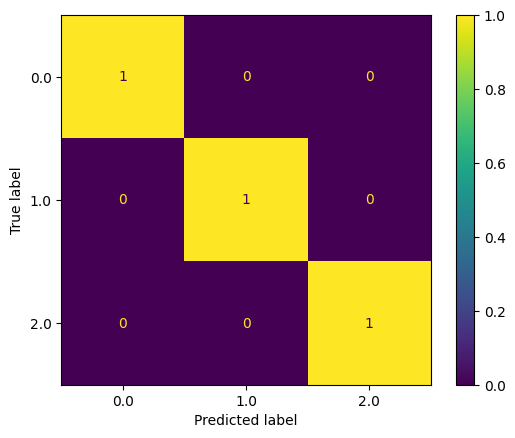

In [10]:
print("Linear regression: ", accuracy_score(y_test, lr_prediction))

cm = confusion_matrix(y_test, lr_prediction, labels=np.unique(df.target), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df.target))
disp.plot()

SVM:  1.0


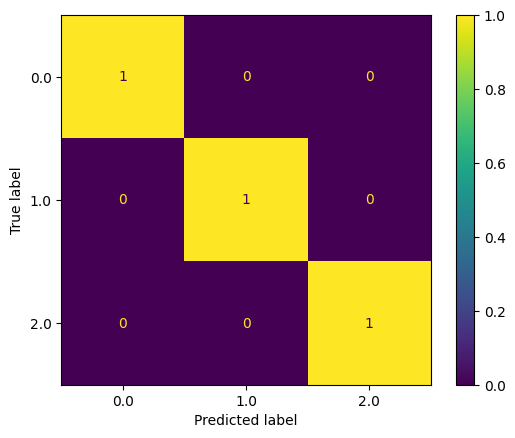

In [11]:
print("SVM: ", accuracy_score(y_test, svc_prediction))

cm = confusion_matrix(y_test, svc_prediction, labels=np.unique(df.target), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df.target))
disp.plot()

Decision tree:  0.9166666666666666


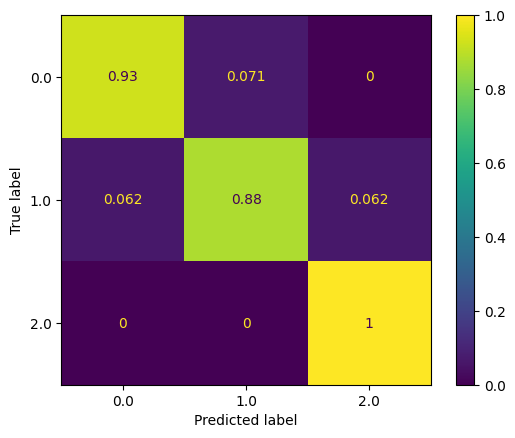

In [12]:
print("Decision tree: ", accuracy_score(y_test, dt_prediction))

cm = confusion_matrix(y_test, dt_prediction, labels=np.unique(df.target), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df.target))
disp.plot()

### Важность признаков

In [13]:
list(zip(x.columns.values, dt.feature_importances_))

[('alcohol', 0.0),
 ('malic_acid', 0.0035603386757700473),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.6438305026852799),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.13257349788521763),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.22003566075373246)]

In [14]:
def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    # Sorting the values of the importance of features in descending order
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Features names
    labels = [x for x,_ in sorted_list]
    # Features importance
    data = [x for _,x in sorted_list]
    # Graph output
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Values output
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

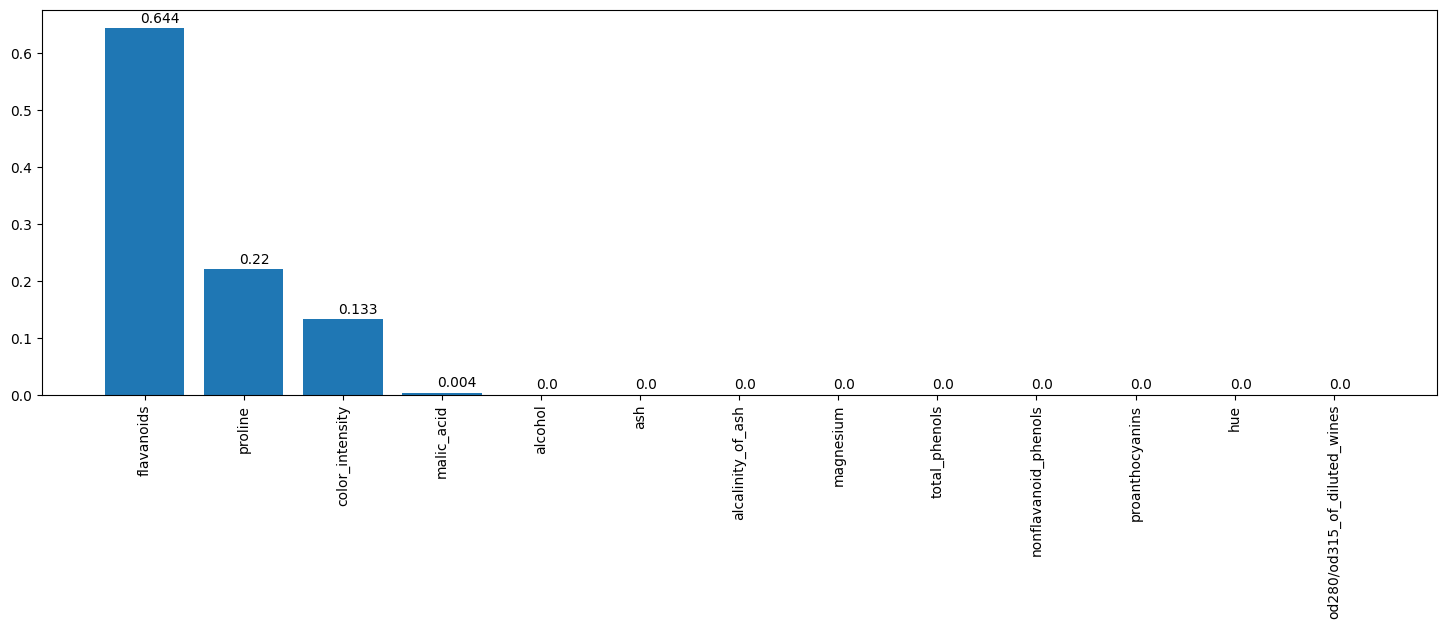

In [15]:
dt_fl, dt_fd = draw_feature_importances(dt, x)

### Визуализация дерева решений

[Text(0.4090909090909091, 0.9, 'x[6] <= 0.261\nsquared_error = 0.612\nsamples = 142\nvalue = 0.979'),
 Text(0.18181818181818182, 0.7, 'x[9] <= 0.217\nsquared_error = 0.164\nsamples = 53\nvalue = 1.792'),
 Text(0.09090909090909091, 0.5, 'squared_error = 0.0\nsamples = 11\nvalue = 1.0'),
 Text(0.2727272727272727, 0.5, 'squared_error = 0.0\nsamples = 42\nvalue = 2.0'),
 Text(0.6363636363636364, 0.7, 'x[12] <= 0.34\nsquared_error = 0.25\nsamples = 89\nvalue = 0.494'),
 Text(0.45454545454545453, 0.5, 'x[1] <= 0.629\nsquared_error = 0.023\nsamples = 42\nvalue = 0.976'),
 Text(0.36363636363636365, 0.3, 'squared_error = 0.0\nsamples = 39\nvalue = 1.0'),
 Text(0.5454545454545454, 0.3, 'x[12] <= 0.18\nsquared_error = 0.222\nsamples = 3\nvalue = 0.667'),
 Text(0.45454545454545453, 0.1, 'squared_error = 0.0\nsamples = 2\nvalue = 1.0'),
 Text(0.6363636363636364, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(0.8181818181818182, 0.5, 'x[9] <= 0.184\nsquared_error = 0.06\nsamples = 47\n

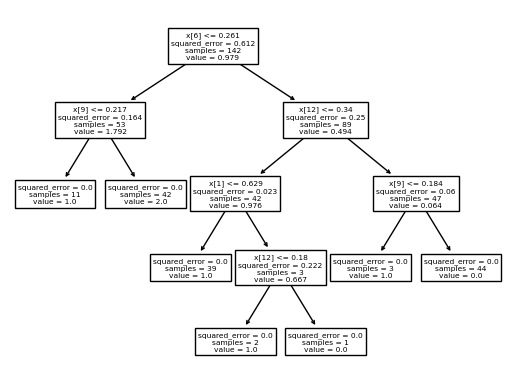

In [16]:
tree.plot_tree(dt) 